<a href="https://colab.research.google.com/github/Prince125047/job_recommendation/blob/main/distillation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas scikit-learn xgboost lightgbm catboost tensorflow keras dask scipy joblib matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

df = pd.read_csv('/content/final_dataset.csv')

df.head()

,Job,Skills
0,AI Research Scientist,"Reinforcement Learning, Deep Learning, Natural..."
1,Database Administrator,"SQL, Database Optimization, NoSQL"
2,Backend Developer,"Spring Boot, SQL, Node.js"
3,Security Engineer,"Encryption, Penetration Testing, SIEM, Network..."
4,Network Engineer,"Switching, Routing, Firewalls, Network Protocols"


In [ ]:
print(len(df))

42552


In [ ]:
print("Total unique job roles:",df['Job'].nunique())

Total unique job roles: 30


In [ ]:
print(df['Job'].value_counts())

Job
DevOps Engineer                 1492
Business Analyst                1479
AI Research Scientist           1473
Blockchain Developer            1472
Cybersecurity Analyst           1463
IT Support Specialist           1461
ERP Consultant                  1459
Security Engineer               1450
Cloud Architect                 1443
Network Engineer                1429
Salesforce Developer            1428
Systems Analyst                 1425
Big Data Analyst                1420
Frontend Developer              1413
Technical Writer                1413
Data Engineer                   1412
Scrum Master                    1410
Game Developer                  1409
Solution Architect              1408
Digital Marketing Specialist    1406
QA Engineer                     1402
Mobile App Developer            1398
Backend Developer               1396
UI/UX Designer                  1394
Product Manager                 1390
Data Scientist                  1387
ML Engineer                     13

In [ ]:
print(df.columns)

Index(['Job', 'Skills'], dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5332
[LightGBM] [Info] Number of data points in the train set: 29786, number of used features: 171
[LightGBM] [Info] Start training from score -3.350022
[LightGBM] [Info] Start training from score -3.431740
[LightGBM] [Info] Start training from score -3.395039
[LightGBM] [Info] Start training from score -3.356743
[LightGBM] [Info] Start training from score -3.405099
[LightGBM] [Info] Start training from score -3.358671
[LightGBM] [Info] Start training from score -3.390046
[LightGBM] [Info] Start training from score -3.369346
[LightGBM] [Info] Start training from score -3.446385
[LightGBM] [Info] Start training from score -3.445332
[LightGBM] [Info] Start training from score -3.312458
[LightGBM] [Info] Start training from score -3.39004

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                 Model  Accuracy  Train Time (s)  Prediction Time (s)
2                  SVM  0.992558       11.125648             0.828510
4          Naive Bayes  0.992558        0.010095             0.001972
0  Logistic Regression  0.992167        0.930967             0.008724
1        Random Forest  0.992088        4.576257             0.241407
5              XGBoost  0.992088        5.022015             0.563051
7             CatBoost  0.992088      200.996820             0.129479
3                  KNN  0.991932        0.003309            11.012754
6             LightGBM  0.991697       12.901077             2.644417


<ipython-input-9-9d1c1d51578b>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
<ipython-input-9-9d1c1d51578b>:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Train Time (s)', y='Model', data=results_df, palette='viridis')


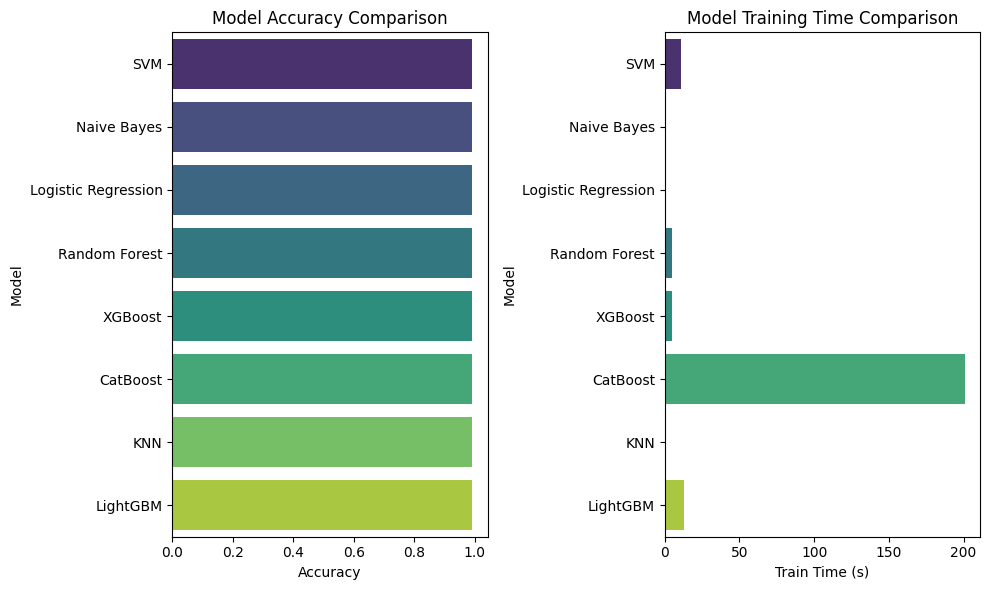

Best Model: SVM with Accuracy: 0.9926


In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Skills'])  # 'Skills' column for TF-IDF
y = df['Job']  # Assuming 'Job' is the target label

# Label Encoding for job titles
encoder = LabelEncoder()
y = encoder.fit_transform(df['Job'])  # 'Job' is the target column

# Split Data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': MultinomialNB(),
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': cb.CatBoostClassifier(verbose=0)
}

# Store Results
results = {
    'Model': [],
    'Accuracy': [],
    'Train Time (s)': [],
    'Prediction Time (s)': []
}

# Train and evaluate each model
for model_name, model in models.items():
    # Record start time for training
    start_train_time = time.time()

    # Train model
    model.fit(X_train, y_train)

    # Record end time for training
    end_train_time = time.time()
    train_time = end_train_time - start_train_time

    # Record start time for prediction
    start_pred_time = time.time()

    # Predict on test set
    y_pred = model.predict(X_test)

    # Record end time for prediction
    end_pred_time = time.time()
    pred_time = end_pred_time - start_pred_time

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Train Time (s)'].append(train_time)
    results['Prediction Time (s)'].append(pred_time)

# Convert results to DataFrame for easier comparison
results_df = pd.DataFrame(results)

# Sort by Accuracy
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Display the results
print(results_df)

# Plot performance comparison
plt.figure(figsize=(10,6))

# Accuracy Comparison
plt.subplot(1, 2, 1)
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')

# Time Comparison
plt.subplot(1, 2, 2)
sns.barplot(x='Train Time (s)', y='Model', data=results_df, palette='viridis')
plt.title('Model Training Time Comparison')

plt.tight_layout()
plt.show()

# Best Model Selection
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"Best Model: {best_model_name} with Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")

In [ ]:
import numpy as np

# Get probability predictions (soft labels)
rf_probs = models['Random Forest'].predict_proba(X_train)
lr_probs = models['Logistic Regression'].predict_proba(X_train)
svm_probs = models['SVM'].predict_proba(X_train)
xgb_probs = models['XGBoost'].predict_proba(X_train)
lgb_probs = models['LightGBM'].predict_proba(X_train)
cb_probs = models['CatBoost'].predict_proba(X_train)

# Average the probabilities from all models (soft labels)
soft_labels = (rf_probs + lr_probs + svm_probs + xgb_probs + lgb_probs + cb_probs) / 6

# Print soft labels (first 5 examples)
print(soft_labels[:5])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[[5.57963341e-05 8.40284500e-05 6.80933983e-05 8.95108384e-05
  5.96814269e-05 9.03439609e-05 8.13526010e-05 8.09296954e-05
  8.52568052e-05 1.17329335e-04 1.06773316e-04 8.11224394e-05
  9.18046062e-05 1.61819965e-04 1.90247409e-04 1.30823024e-04
  1.70924601e-04 1.11370141e-04 9.98695662e-05 9.97095397e-01
  1.00973233e-04 1.00865777e-04 8.43165405e-05 1.23199205e-04
  1.02246252e-04 7.01604773e-05 1.05886505e-04 6.45136807e-05
  7.18660230e-05 1.23501877e-04]
 [9.96695033e-01 1.64180302e-04 1.30121540e-04 6.86375054e-05
  5.58341815e-05 9.47987627e-05 9.51983556e-05 1.47729716e-04
  2.58577884e-04 1.02834274e-04 1.01900638e-04 6.96801257e-05
  8.15915307e-05 1.76471039e-04 8.94885132e-05 1.31200095e-04
  1.78752776e-04 1.07078961e-04 2.35198168e-04 1.02649008e-04
  1.01596237e-04 1.03878022e-04 9.02698671e-05 1.04704042e-04
  1.01379675e-04 9.04458601e-05 9.98464373e-05 5.78646013e-05
  5.89305167e-05 1.04125361e-04]
 [3.16991020e-05 4.50008599e-05 4.54837734e-05 6.80767815e-05
  1.

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define student model
input_layer = layers.Input(shape=(X_train.shape[1],))

hidden = layers.Dense(64, activation="relu")(input_layer)
hidden = layers.Dense(32, activation="relu")(hidden)

# Job classification output
job_output = layers.Dense(soft_labels.shape[1], activation="softmax", name="job_output")(hidden)

# Define student model
student_model = tf.keras.Model(inputs=input_layer, outputs=job_output)

# Compile with KL-Divergence loss (distillation loss)
student_model.compile(optimizer="adam", loss="kl_divergence", metrics=["accuracy"])

# Train on soft labels
student_model.fit(X_train.toarray(), soft_labels, epochs=10, batch_size=32)

# Save the student model
student_model.save("student_model.h5")


Epoch 1/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8059 - loss: 1.2490
Epoch 2/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9989 - loss: 0.0102
Epoch 3/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9991 - loss: 0.0063
Epoch 4/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9991 - loss: 0.0045
Epoch 5/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9989 - loss: 0.0033
Epoch 6/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9991 - loss: 0.0025
Epoch 7/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9992 - loss: 0.0019
Epoch 8/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9990 - loss: 0.0015
Epoch 9/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9992 - loss: 0.0011
Epoch 10/10
931/931 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9994 - loss: 8.9167e-04


In [ ]:
from tensorflow.keras.models import load_model
student_model = load_model("student_model.h5")

In [ ]:
X_test_array = X_test.toarray()  # Convert sparse matrix if needed

In [ ]:
student_predictions = student_model.predict(X_test_array)

399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Make predictions
student_predictions = student_model.predict(X_test.toarray())

# Convert softmax probabilities to class labels
student_predictions_hard = np.argmax(student_predictions, axis=1)

# No need for np.argmax on y_test, use it directly
accuracy = accuracy_score(y_test, student_predictions_hard)
print(f"Student Model Accuracy: {accuracy:.4f}")

399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Student Model Accuracy: 0.9925


In [ ]:
from joblib import load
import os

model_files = ["Logistic Regression.pkl", "KNN.pkl", "Random Forest.pkl",
               "SVM.pkl", "Naive Bayes.pkl", "XGBoost.pkl", "LightGBM.pkl"]

model_accuracies = {}

for model_file in model_files:
    if os.path.exists(model_file):  # Check if file exists
        try:
            model = load(model_file)  # Use joblib instead of pickle
            model_predictions = model.predict(X_test)
            accuracy = accuracy_score(y_test, model_predictions)
            model_accuracies[model_file] = accuracy
            print(f"{model_file} Accuracy: {accuracy:.4f}")
        except Exception as e:
            print(f"Error loading {model_file}: {e}")

# Student model accuracy
model_accuracies["Student Model"] = accuracy_score(y_test, student_predictions_hard)
print(f"Student Model Accuracy: {model_accuracies['Student Model']:.4f}")

Logistic Regression.pkl Accuracy: 0.9922
KNN.pkl Accuracy: 0.9919
Random Forest.pkl Accuracy: 0.9917
SVM.pkl Accuracy: 0.9926
Naive Bayes.pkl Accuracy: 0.9926
XGBoost.pkl Accuracy: 0.9921


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM.pkl Accuracy: 0.9917
Student Model Accuracy: 0.9925


In [ ]:
import joblib

# Load trained student model
student_model = tf.keras.models.load_model("student_model.h5")

def recommend_jobs(user_skills):
    """Recommend jobs using the student model."""
    user_vectorized = vectorizer.transform([user_skills]).toarray()

    # Get predictions from student model
    job_probs = student_model.predict(user_vectorized)

    # Get top 3 job recommendations
    top_n_indices = np.argsort(job_probs[0])[::-1][:3]
    top_3_jobs = encoder.inverse_transform(top_n_indices)

    print("Top 3 Recommended Jobs:")
    for i, job in enumerate(top_3_jobs, start=1):
        print(f"{i}. {job}")

    return top_3_jobs


In [ ]:
import joblib

# Train and save each model
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train model
    model.fit(X_train, y_train)

    # Save trained model
    joblib.dump(model, f"{model_name}.pkl")
    print(f"Saved {model_name} to {model_name}.pkl")

Training Logistic Regression...
Saved Logistic Regression to Logistic Regression.pkl
Training Random Forest...
Saved Random Forest to Random Forest.pkl
Training SVM...
Saved SVM to SVM.pkl
Training KNN...
Saved KNN to KNN.pkl
Training Naive Bayes...
Saved Naive Bayes to Naive Bayes.pkl
Training XGBoost...
Saved XGBoost to XGBoost.pkl
Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5332
[LightGBM] [Info] Number of data points in the train set: 29786, number of used features: 171
[LightGBM] [Info] Start training from score -3.350022
[LightGBM] [Info] Start training from score -3.431740
[LightGBM] [Info] Start training from score -3.395039
[LightGBM] [Info] Start training from score -3.356743
[LightGBM] [Info] Start training from score -3.405099
[LightGBM] [Info] S

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
def find_missing_skills(job, user_skills):
    """Find missing skills based on the recommended job."""
    job_skills = df[df["Job"] == job]["Skills"].values[0]
    required_skills = set(job_skills.split(", "))
    user_skills_set = set(user_skills.split(","))

    missing_skills = required_skills - user_skills_set
    return list(missing_skills)

<ipython-input-23-684e822c1a78>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
<ipython-input-23-684e822c1a78>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Train Time (s)', y='Model', data=results_df, palette='viridis')


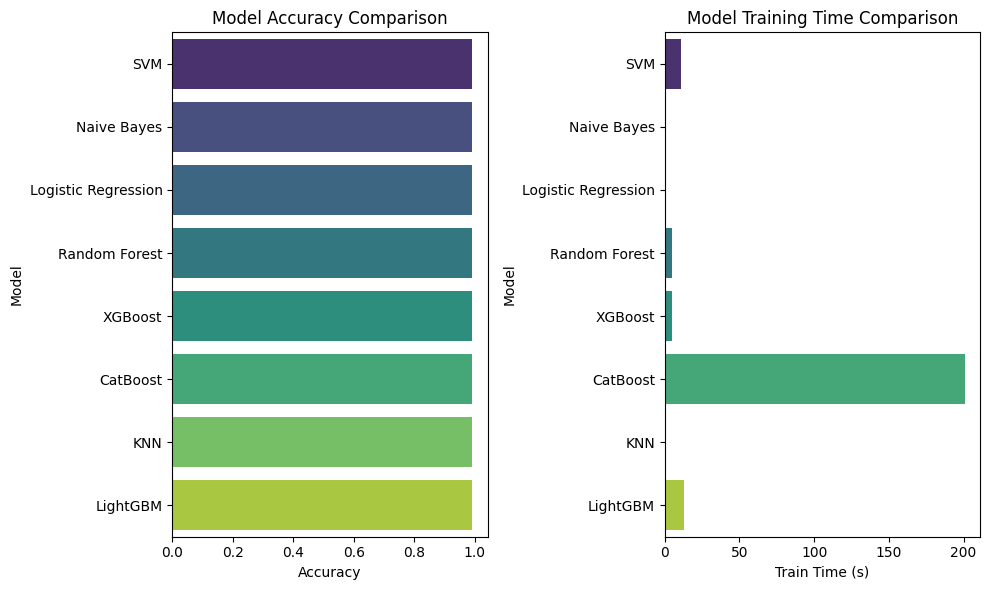

In [ ]:
# Plot performance comparison
plt.figure(figsize=(10,6))

# Accuracy Comparison
plt.subplot(1, 2, 1)
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')

# Time Comparison
plt.subplot(1, 2, 2)
sns.barplot(x='Train Time (s)', y='Model', data=results_df, palette='viridis')
plt.title('Model Training Time Comparison')

plt.tight_layout()
plt.show()

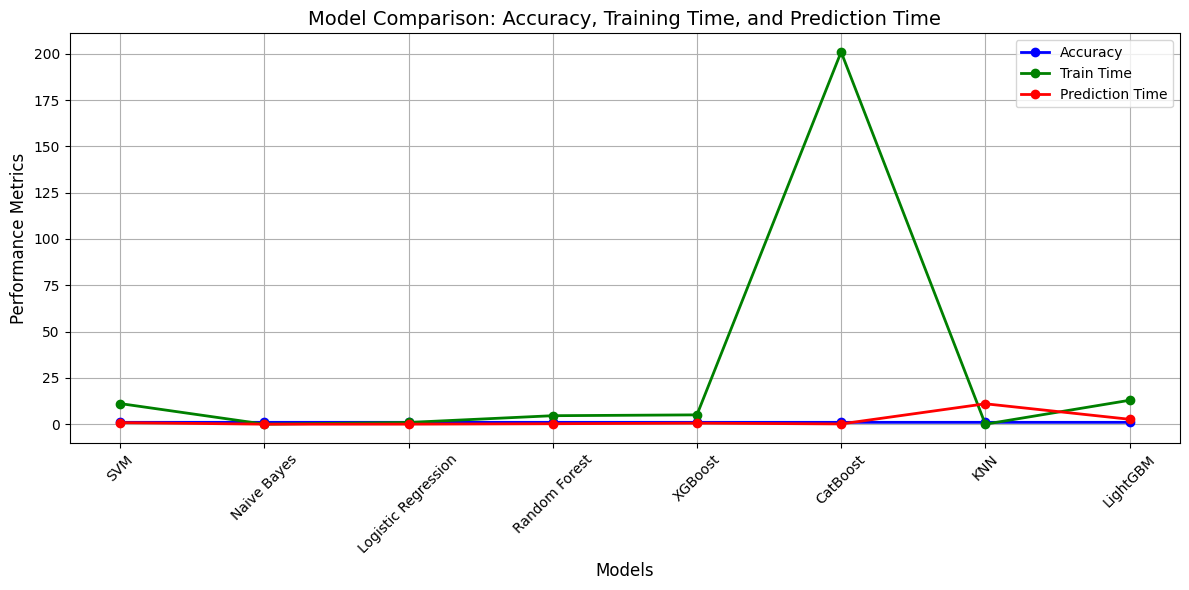

In [ ]:
# Plotting the comparison of accuracy and train/prediction time in a 2D line graph

plt.figure(figsize=(12, 6))

# Accuracy vs. Models (Line plot)
plt.plot(results_df['Model'], results_df['Accuracy'], marker='o', label='Accuracy', color='b', linestyle='-', linewidth=2)

# Training Time vs. Models (Line plot)
plt.plot(results_df['Model'], results_df['Train Time (s)'], marker='o', label='Train Time', color='g', linestyle='-', linewidth=2)

# Prediction Time vs. Models (Line plot)
plt.plot(results_df['Model'], results_df['Prediction Time (s)'], marker='o', label='Prediction Time', color='r', linestyle='-', linewidth=2)

# Adding labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Performance Metrics', fontsize=12)
plt.title('Model Comparison: Accuracy, Training Time, and Prediction Time', fontsize=14)

# Rotate model names for better visibility
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show grid for clarity
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


Logistic Regression.pkl: Accuracy = 0.9922, Prediction Time = 0.0038s
KNN.pkl: Accuracy = 0.9919, Prediction Time = 12.9344s
Random Forest.pkl: Accuracy = 0.9917, Prediction Time = 0.2488s
SVM.pkl: Accuracy = 0.9926, Prediction Time = 2.1123s
Naive Bayes.pkl: Accuracy = 0.9926, Prediction Time = 0.0045s
XGBoost.pkl: Accuracy = 0.9921, Prediction Time = 1.4918s


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM.pkl: Accuracy = 0.9917, Prediction Time = 3.2537s
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step
Student Model: Accuracy = 0.9925, Prediction Time = 0.5160s


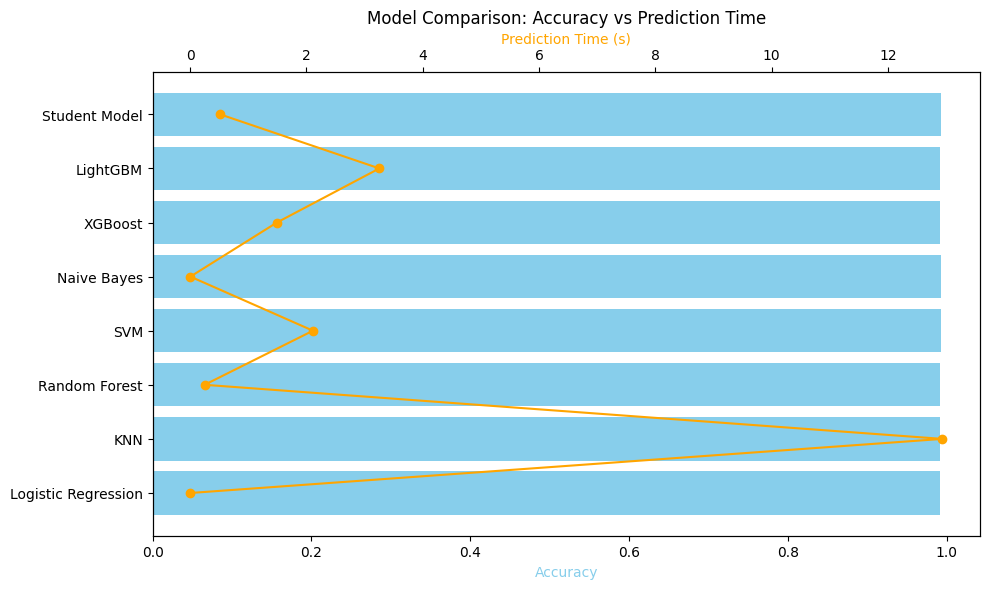

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
from sklearn.metrics import accuracy_score

model_files = ["Logistic Regression.pkl", "KNN.pkl", "Random Forest.pkl",
               "SVM.pkl", "Naive Bayes.pkl", "XGBoost.pkl", "LightGBM.pkl"]

accuracies = []
prediction_times = []
model_names = []

# Measure for each model
for model_file in model_files:
    try:
        model = load(model_file)  # Load model

        # Measure prediction time
        start_pred = time.time()
        predictions = model.predict(X_test)
        end_pred = time.time()
        prediction_times.append(end_pred - start_pred)

        # Store accuracy
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)
        model_names.append(model_file.split(".")[0])  # Remove .pkl from name

        print(f"{model_file}: Accuracy = {accuracy:.4f}, Prediction Time = {prediction_times[-1]:.4f}s")

    except Exception as e:
        print(f"Skipping {model_file}: {e}")

# Student Model Measurements
start_pred = time.time()
student_predictions = student_model.predict(X_test.toarray())
student_predictions_hard = np.argmax(student_predictions, axis=1)  # Convert soft labels to hard labels
end_pred = time.time()
student_accuracy = accuracy_score(y_test, student_predictions_hard)

prediction_times.append(end_pred - start_pred)
accuracies.append(student_accuracy)
model_names.append("Student Model")

print(f"Student Model: Accuracy = {student_accuracy:.4f}, Prediction Time = {prediction_times[-1]:.4f}s")

# Plot Accuracy vs Prediction Time
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.barh(model_names, accuracies, color='skyblue', label='Accuracy')
ax1.set_xlabel('Accuracy', color='skyblue')

ax2 = ax1.twiny()  # Create a second x-axis
ax2.plot(prediction_times, model_names, color='orange', marker='o', label='Prediction Time (s)')
ax2.set_xlabel('Prediction Time (s)', color='orange')

plt.title('Model Comparison: Accuracy vs Prediction Time')
plt.tight_layout()
plt.show()

In [ ]:
# Assume `new_data` is a list of new skill descriptions
new_data = ['Python, Machine Learning, Data Science']

# Convert the new data into the same vectorized form as the training data
new_data_vectorized = vectorizer.transform(new_data)

# Make predictions with the trained best model
new_predictions = best_model.predict(new_data_vectorized)
predicted_job_title = encoder.inverse_transform(new_predictions)

print(f"Predicted Job Title: {predicted_job_title[0]}")

Predicted Job Title: Data Scientist


In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Skills'])  # 'Skills' column for TF-IDF
y = df['Job']  # Assuming 'Job' is the target label
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')  # Save the TfidfVectorizer

['tfidf_vectorizer.pkl']

In [2]:
import joblib
import numpy as np
import pandas as pd
import tensorflow as tf

# Load TF-IDF Vectorizer
vectorizer = joblib.load('/content/tfidf_vectorizer (1).pkl')

# Load Naïve Bayes Model
naive_bayes_model = joblib.load('/content/Naive Bayes.pkl')

# Load Student Model
student_model = tf.keras.models.load_model('/content/student_model.h5')

# Load Dataset
df = pd.read_csv('/content/final_dataset.csv')  # Ensure correct path

In [3]:
def recommend_jobs(user_skills):
    """Recommend jobs using Naïve Bayes without LabelEncoder."""
    user_vectorized = vectorizer.transform([user_skills])

    # Predict job index
    predicted_index = naive_bayes_model.predict(user_vectorized)[0]

    # Get job name directly from dataset
    unique_jobs = df['Job'].unique()  # Get unique job names
    predicted_job = unique_jobs[predicted_index]  # Map prediction to job title

    print(f"Recommended Job: {predicted_job}")
    return predicted_job

In [4]:
def find_missing_skills(job, user_skills):
    """Find missing skills based on job requirements."""
    job_skills_list = df[df["Job"] == job]["Skills"].values

    if len(job_skills_list) == 0:
        print("Job not found in dataset.")
        return []

    job_skills = set(job_skills_list[0].split(", "))  # Convert to set
    user_skills_set = set(user_skills.split(","))  # Convert user input

    missing_skills = job_skills - user_skills_set
    return list(missing_skills)

In [7]:
# Example user input
user_input_skills = "HTML,CSS,Java"

# Get job recommendation
recommended_job = recommend_jobs(user_input_skills)

# Identify missing skills
missing_skills = find_missing_skills(recommended_job, user_input_skills)

print(f"Missing Skills for {recommended_job}: {missing_skills}")

Recommended Job: Frontend Developer
Missing Skills for Frontend Developer: ['JavaScript', 'Angular', 'React', 'Vue.js']
